In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from graphviz import Digraph

In [15]:
from comp_graph_node import Node
from neural_network import Neuron, Layer, MLP 

In [16]:
np.random.seed(1337)
random.seed(1337)

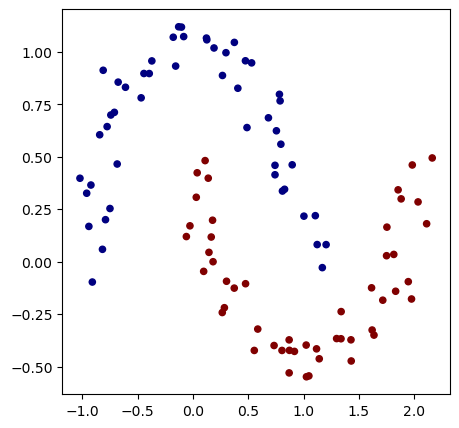

In [17]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [18]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP (Layer (ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2), Layer (ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16), Layer (ReLU - Neurônio 16))
number of parameters 337


In [19]:
def loss(batch_size=None):
    # Data Loader para computar a loss
    if batch_size is None:
        Xb, yb = X,y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    inputs = [list(map(Node, xrow)) for xrow in Xb]

    scores = list(map(model, inputs))

    # max-margin loss
    losses = [(1 + -yi * score_i).relu() for yi, score_i in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    # Regularização L2
    alpha = 1e-4
    reg_loss = alpha * sum((param * param for param in model.parameters()))
    total_loss = data_loss + reg_loss

    # accuracy score
    accuracy = [(yi > 0) == (score_i.scalar > 0) for yi, score_i in zip(yb, scores)]

    return total_loss, sum(accuracy) / len(accuracy)

In [20]:
total_loss, acc = loss()
print(total_loss, acc)

Node(scalar=0.8958441028683222, gradient=0) 0.5


In [21]:
print(model)

MLP (Layer (ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2,ReLU - Neurônio 2), Layer (ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16,ReLU - Neurônio 16), Layer (ReLU - Neurônio 16))


In [22]:
n_epochs = 100
# optimization
for epoch in range(n_epochs):
    # forward
    total_loss, acc = loss()
    
    # backward
    model.clear_gradient()
    total_loss.backward_propagation()

    # update (sgd)
    learning_rate = 1.0 - 0.9 * n_epochs / 100
    
    for param in model.parameters():
        param.scalar -= learning_rate * param.gradient
    
    if epoch % 1 == 0:
        print(f"step {epoch} loss {total_loss.scalar}, accuracy {acc*100}%")

step 0 loss 0.8958441028683222, accuracy 50.0%
step 1 loss 0.47260892608091765, accuracy 79.0%
step 2 loss 0.40199499687133367, accuracy 81.0%
step 3 loss 0.35260725677305943, accuracy 83.0%
step 4 loss 0.3261724123318524, accuracy 86.0%
step 5 loss 0.33177453323254896, accuracy 83.0%
step 6 loss 0.3058808440436311, accuracy 88.0%
step 7 loss 0.29735747089104075, accuracy 85.0%
step 8 loss 0.2900177307502625, accuracy 87.0%
step 9 loss 0.2833970283440888, accuracy 87.0%
step 10 loss 0.2778450230053407, accuracy 87.0%
step 11 loss 0.27400178091455174, accuracy 87.0%
step 12 loss 0.2706486487470969, accuracy 88.0%
step 13 loss 0.2675199728027506, accuracy 90.0%
step 14 loss 0.2643051387745756, accuracy 88.0%
step 15 loss 0.26205332161768147, accuracy 90.0%
step 16 loss 0.2584517802186572, accuracy 90.0%
step 17 loss 0.2562652559114352, accuracy 90.0%
step 18 loss 0.2534670362381318, accuracy 90.0%
step 19 loss 0.25065419540133826, accuracy 90.0%
step 20 loss 0.24790130635192892, accuracy

(-1.548639298268643, 1.951360701731357)

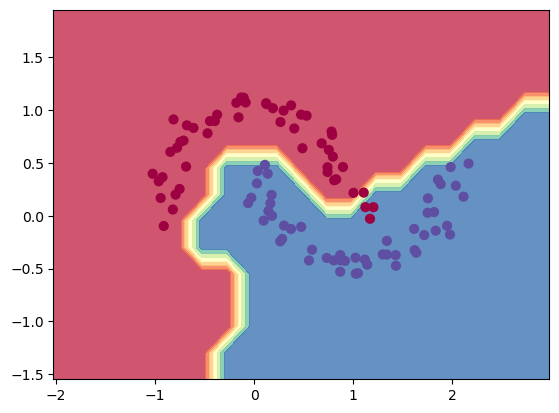

In [25]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Node, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.scalar > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())